# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="/Users/schand/Music/udaci/deep-reinforcement-learning/p1_navigation/Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state

score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
import torch
from collections import deque

from dqn_agent import Agent

def dqn(agent, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, train_mode = True):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name] # reset environment
        state = env_info.vector_observations[0]  
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name] 
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
                
        scores_window.append(score)
        scores.append(score)
        eps = max(eps_end, eps_decay*eps)
        print('\r Episodes : {}\tAverage Score : {:.2f}'.format(i_episode, np.mean(scores_window)), end = "")
        if(i_episode%100==0):
            print('\r Episodes : {}\tAverage Score : {:.2f}'.format(i_episode, np.mean(scores_window)))
        if(np.mean(scores_window)>=13.0 and train_mode):
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
        if (train_mode):
            torch.save(agent.qnetwork_local.state_dict(), "checkpoint.pth")
    return scores
            
            

In [8]:
import matplotlib.pyplot as plt

agent = Agent(state_size=state_size, action_size=action_size, seed=0)
scores = dqn(agent)



 Episodes : 100	Average Score : 1.06
 Episodes : 200	Average Score : 4.62
 Episodes : 300	Average Score : 7.97
 Episodes : 400	Average Score : 10.55
 Episodes : 500	Average Score : 12.45
 Episodes : 534	Average Score : 13.03
Environment solved in 434 episodes!	Average Score: 13.03
 Episodes : 537	Average Score : 13.01
Environment solved in 437 episodes!	Average Score: 13.01
 Episodes : 538	Average Score : 13.00
Environment solved in 438 episodes!	Average Score: 13.00
 Episodes : 539	Average Score : 13.01
Environment solved in 439 episodes!	Average Score: 13.01
 Episodes : 546	Average Score : 13.00
Environment solved in 446 episodes!	Average Score: 13.00
 Episodes : 547	Average Score : 13.03
Environment solved in 447 episodes!	Average Score: 13.03
 Episodes : 548	Average Score : 13.11
Environment solved in 448 episodes!	Average Score: 13.11
 Episodes : 549	Average Score : 13.16
Environment solved in 449 episodes!	Average Score: 13.16
 Episodes : 550	Average Score : 13.28
Environment sol

 Episodes : 627	Average Score : 13.94
Environment solved in 527 episodes!	Average Score: 13.94
 Episodes : 628	Average Score : 14.01
Environment solved in 528 episodes!	Average Score: 14.01
 Episodes : 629	Average Score : 14.10
Environment solved in 529 episodes!	Average Score: 14.10
 Episodes : 630	Average Score : 14.19
Environment solved in 530 episodes!	Average Score: 14.19
 Episodes : 631	Average Score : 14.15
Environment solved in 531 episodes!	Average Score: 14.15
 Episodes : 632	Average Score : 14.22
Environment solved in 532 episodes!	Average Score: 14.22
 Episodes : 633	Average Score : 14.10
Environment solved in 533 episodes!	Average Score: 14.10
 Episodes : 634	Average Score : 14.08
Environment solved in 534 episodes!	Average Score: 14.08
 Episodes : 635	Average Score : 14.12
Environment solved in 535 episodes!	Average Score: 14.12
 Episodes : 636	Average Score : 14.16
Environment solved in 536 episodes!	Average Score: 14.16
 Episodes : 637	Average Score : 14.07
Environment 

 Episodes : 714	Average Score : 15.07
Environment solved in 614 episodes!	Average Score: 15.07
 Episodes : 715	Average Score : 15.10
Environment solved in 615 episodes!	Average Score: 15.10
 Episodes : 716	Average Score : 15.11
Environment solved in 616 episodes!	Average Score: 15.11
 Episodes : 717	Average Score : 15.13
Environment solved in 617 episodes!	Average Score: 15.13
 Episodes : 718	Average Score : 15.15
Environment solved in 618 episodes!	Average Score: 15.15
 Episodes : 719	Average Score : 15.18
Environment solved in 619 episodes!	Average Score: 15.18
 Episodes : 720	Average Score : 15.29
Environment solved in 620 episodes!	Average Score: 15.29
 Episodes : 721	Average Score : 15.21
Environment solved in 621 episodes!	Average Score: 15.21
 Episodes : 722	Average Score : 15.23
Environment solved in 622 episodes!	Average Score: 15.23
 Episodes : 723	Average Score : 15.23
Environment solved in 623 episodes!	Average Score: 15.23
 Episodes : 724	Average Score : 15.20
Environment 

 Episodes : 801	Average Score : 15.45
Environment solved in 701 episodes!	Average Score: 15.45
 Episodes : 802	Average Score : 15.49
Environment solved in 702 episodes!	Average Score: 15.49
 Episodes : 803	Average Score : 15.48
Environment solved in 703 episodes!	Average Score: 15.48
 Episodes : 804	Average Score : 15.50
Environment solved in 704 episodes!	Average Score: 15.50
 Episodes : 805	Average Score : 15.52
Environment solved in 705 episodes!	Average Score: 15.52
 Episodes : 806	Average Score : 15.51
Environment solved in 706 episodes!	Average Score: 15.51
 Episodes : 807	Average Score : 15.53
Environment solved in 707 episodes!	Average Score: 15.53
 Episodes : 808	Average Score : 15.54
Environment solved in 708 episodes!	Average Score: 15.54
 Episodes : 809	Average Score : 15.54
Environment solved in 709 episodes!	Average Score: 15.54
 Episodes : 810	Average Score : 15.58
Environment solved in 710 episodes!	Average Score: 15.58
 Episodes : 811	Average Score : 15.49
Environment 

 Episodes : 888	Average Score : 15.50
Environment solved in 788 episodes!	Average Score: 15.50
 Episodes : 889	Average Score : 15.51
Environment solved in 789 episodes!	Average Score: 15.51
 Episodes : 890	Average Score : 15.61
Environment solved in 790 episodes!	Average Score: 15.61
 Episodes : 891	Average Score : 15.60
Environment solved in 791 episodes!	Average Score: 15.60
 Episodes : 892	Average Score : 15.56
Environment solved in 792 episodes!	Average Score: 15.56
 Episodes : 893	Average Score : 15.52
Environment solved in 793 episodes!	Average Score: 15.52
 Episodes : 894	Average Score : 15.53
Environment solved in 794 episodes!	Average Score: 15.53
 Episodes : 895	Average Score : 15.52
Environment solved in 795 episodes!	Average Score: 15.52
 Episodes : 896	Average Score : 15.57
Environment solved in 796 episodes!	Average Score: 15.57
 Episodes : 897	Average Score : 15.64
Environment solved in 797 episodes!	Average Score: 15.64
 Episodes : 898	Average Score : 15.63
Environment 

 Episodes : 975	Average Score : 15.84
Environment solved in 875 episodes!	Average Score: 15.84
 Episodes : 976	Average Score : 15.80
Environment solved in 876 episodes!	Average Score: 15.80
 Episodes : 977	Average Score : 15.88
Environment solved in 877 episodes!	Average Score: 15.88
 Episodes : 978	Average Score : 15.83
Environment solved in 878 episodes!	Average Score: 15.83
 Episodes : 979	Average Score : 15.82
Environment solved in 879 episodes!	Average Score: 15.82
 Episodes : 980	Average Score : 15.77
Environment solved in 880 episodes!	Average Score: 15.77
 Episodes : 981	Average Score : 15.75
Environment solved in 881 episodes!	Average Score: 15.75
 Episodes : 982	Average Score : 15.68
Environment solved in 882 episodes!	Average Score: 15.68
 Episodes : 983	Average Score : 15.71
Environment solved in 883 episodes!	Average Score: 15.71
 Episodes : 984	Average Score : 15.68
Environment solved in 884 episodes!	Average Score: 15.68
 Episodes : 985	Average Score : 15.71
Environment 

 Episodes : 1061	Average Score : 15.71
Environment solved in 961 episodes!	Average Score: 15.71
 Episodes : 1062	Average Score : 15.72
Environment solved in 962 episodes!	Average Score: 15.72
 Episodes : 1063	Average Score : 15.66
Environment solved in 963 episodes!	Average Score: 15.66
 Episodes : 1064	Average Score : 15.76
Environment solved in 964 episodes!	Average Score: 15.76
 Episodes : 1065	Average Score : 15.75
Environment solved in 965 episodes!	Average Score: 15.75
 Episodes : 1066	Average Score : 15.75
Environment solved in 966 episodes!	Average Score: 15.75
 Episodes : 1067	Average Score : 15.78
Environment solved in 967 episodes!	Average Score: 15.78
 Episodes : 1068	Average Score : 15.79
Environment solved in 968 episodes!	Average Score: 15.79
 Episodes : 1069	Average Score : 15.72
Environment solved in 969 episodes!	Average Score: 15.72
 Episodes : 1070	Average Score : 15.87
Environment solved in 970 episodes!	Average Score: 15.87
 Episodes : 1071	Average Score : 15.86
E

 Episodes : 1146	Average Score : 15.53
Environment solved in 1046 episodes!	Average Score: 15.53
 Episodes : 1147	Average Score : 15.43
Environment solved in 1047 episodes!	Average Score: 15.43
 Episodes : 1148	Average Score : 15.47
Environment solved in 1048 episodes!	Average Score: 15.47
 Episodes : 1149	Average Score : 15.44
Environment solved in 1049 episodes!	Average Score: 15.44
 Episodes : 1150	Average Score : 15.35
Environment solved in 1050 episodes!	Average Score: 15.35
 Episodes : 1151	Average Score : 15.39
Environment solved in 1051 episodes!	Average Score: 15.39
 Episodes : 1152	Average Score : 15.37
Environment solved in 1052 episodes!	Average Score: 15.37
 Episodes : 1153	Average Score : 15.35
Environment solved in 1053 episodes!	Average Score: 15.35
 Episodes : 1154	Average Score : 15.32
Environment solved in 1054 episodes!	Average Score: 15.32
 Episodes : 1155	Average Score : 15.22
Environment solved in 1055 episodes!	Average Score: 15.22
 Episodes : 1156	Average Score

 Episodes : 1231	Average Score : 15.85
Environment solved in 1131 episodes!	Average Score: 15.85
 Episodes : 1232	Average Score : 15.78
Environment solved in 1132 episodes!	Average Score: 15.78
 Episodes : 1233	Average Score : 15.70
Environment solved in 1133 episodes!	Average Score: 15.70
 Episodes : 1234	Average Score : 15.70
Environment solved in 1134 episodes!	Average Score: 15.70
 Episodes : 1235	Average Score : 15.68
Environment solved in 1135 episodes!	Average Score: 15.68
 Episodes : 1236	Average Score : 15.74
Environment solved in 1136 episodes!	Average Score: 15.74
 Episodes : 1237	Average Score : 15.70
Environment solved in 1137 episodes!	Average Score: 15.70
 Episodes : 1238	Average Score : 15.69
Environment solved in 1138 episodes!	Average Score: 15.69
 Episodes : 1239	Average Score : 15.78
Environment solved in 1139 episodes!	Average Score: 15.78
 Episodes : 1240	Average Score : 15.67
Environment solved in 1140 episodes!	Average Score: 15.67
 Episodes : 1241	Average Score

 Episodes : 1316	Average Score : 16.16
Environment solved in 1216 episodes!	Average Score: 16.16
 Episodes : 1317	Average Score : 16.18
Environment solved in 1217 episodes!	Average Score: 16.18
 Episodes : 1318	Average Score : 16.21
Environment solved in 1218 episodes!	Average Score: 16.21
 Episodes : 1319	Average Score : 16.28
Environment solved in 1219 episodes!	Average Score: 16.28
 Episodes : 1320	Average Score : 16.28
Environment solved in 1220 episodes!	Average Score: 16.28
 Episodes : 1321	Average Score : 16.28
Environment solved in 1221 episodes!	Average Score: 16.28
 Episodes : 1322	Average Score : 16.28
Environment solved in 1222 episodes!	Average Score: 16.28
 Episodes : 1323	Average Score : 16.27
Environment solved in 1223 episodes!	Average Score: 16.27
 Episodes : 1324	Average Score : 16.20
Environment solved in 1224 episodes!	Average Score: 16.20
 Episodes : 1325	Average Score : 16.17
Environment solved in 1225 episodes!	Average Score: 16.17
 Episodes : 1326	Average Score

 Episodes : 1401	Average Score : 15.84
Environment solved in 1301 episodes!	Average Score: 15.84
 Episodes : 1402	Average Score : 15.70
Environment solved in 1302 episodes!	Average Score: 15.70
 Episodes : 1403	Average Score : 15.61
Environment solved in 1303 episodes!	Average Score: 15.61
 Episodes : 1404	Average Score : 15.54
Environment solved in 1304 episodes!	Average Score: 15.54
 Episodes : 1405	Average Score : 15.52
Environment solved in 1305 episodes!	Average Score: 15.52
 Episodes : 1406	Average Score : 15.49
Environment solved in 1306 episodes!	Average Score: 15.49
 Episodes : 1407	Average Score : 15.49
Environment solved in 1307 episodes!	Average Score: 15.49
 Episodes : 1408	Average Score : 15.53
Environment solved in 1308 episodes!	Average Score: 15.53
 Episodes : 1409	Average Score : 15.47
Environment solved in 1309 episodes!	Average Score: 15.47
 Episodes : 1410	Average Score : 15.50
Environment solved in 1310 episodes!	Average Score: 15.50
 Episodes : 1411	Average Score

 Episodes : 1486	Average Score : 15.97
Environment solved in 1386 episodes!	Average Score: 15.97
 Episodes : 1487	Average Score : 15.92
Environment solved in 1387 episodes!	Average Score: 15.92
 Episodes : 1488	Average Score : 15.97
Environment solved in 1388 episodes!	Average Score: 15.97
 Episodes : 1489	Average Score : 15.98
Environment solved in 1389 episodes!	Average Score: 15.98
 Episodes : 1490	Average Score : 15.99
Environment solved in 1390 episodes!	Average Score: 15.99
 Episodes : 1491	Average Score : 16.00
Environment solved in 1391 episodes!	Average Score: 16.00
 Episodes : 1492	Average Score : 15.99
Environment solved in 1392 episodes!	Average Score: 15.99
 Episodes : 1493	Average Score : 15.96
Environment solved in 1393 episodes!	Average Score: 15.96
 Episodes : 1494	Average Score : 15.94
Environment solved in 1394 episodes!	Average Score: 15.94
 Episodes : 1495	Average Score : 15.98
Environment solved in 1395 episodes!	Average Score: 15.98
 Episodes : 1496	Average Score

 Episodes : 1571	Average Score : 15.59
Environment solved in 1471 episodes!	Average Score: 15.59
 Episodes : 1572	Average Score : 15.45
Environment solved in 1472 episodes!	Average Score: 15.45
 Episodes : 1573	Average Score : 15.51
Environment solved in 1473 episodes!	Average Score: 15.51
 Episodes : 1574	Average Score : 15.53
Environment solved in 1474 episodes!	Average Score: 15.53
 Episodes : 1575	Average Score : 15.52
Environment solved in 1475 episodes!	Average Score: 15.52
 Episodes : 1576	Average Score : 15.49
Environment solved in 1476 episodes!	Average Score: 15.49
 Episodes : 1577	Average Score : 15.51
Environment solved in 1477 episodes!	Average Score: 15.51
 Episodes : 1578	Average Score : 15.49
Environment solved in 1478 episodes!	Average Score: 15.49
 Episodes : 1579	Average Score : 15.51
Environment solved in 1479 episodes!	Average Score: 15.51
 Episodes : 1580	Average Score : 15.49
Environment solved in 1480 episodes!	Average Score: 15.49
 Episodes : 1581	Average Score

 Episodes : 1656	Average Score : 15.69
Environment solved in 1556 episodes!	Average Score: 15.69
 Episodes : 1657	Average Score : 15.69
Environment solved in 1557 episodes!	Average Score: 15.69
 Episodes : 1658	Average Score : 15.66
Environment solved in 1558 episodes!	Average Score: 15.66
 Episodes : 1659	Average Score : 15.70
Environment solved in 1559 episodes!	Average Score: 15.70
 Episodes : 1660	Average Score : 15.74
Environment solved in 1560 episodes!	Average Score: 15.74
 Episodes : 1661	Average Score : 15.76
Environment solved in 1561 episodes!	Average Score: 15.76
 Episodes : 1662	Average Score : 15.78
Environment solved in 1562 episodes!	Average Score: 15.78
 Episodes : 1663	Average Score : 15.78
Environment solved in 1563 episodes!	Average Score: 15.78
 Episodes : 1664	Average Score : 15.84
Environment solved in 1564 episodes!	Average Score: 15.84
 Episodes : 1665	Average Score : 15.81
Environment solved in 1565 episodes!	Average Score: 15.81
 Episodes : 1666	Average Score

 Episodes : 1741	Average Score : 16.89
Environment solved in 1641 episodes!	Average Score: 16.89
 Episodes : 1742	Average Score : 16.90
Environment solved in 1642 episodes!	Average Score: 16.90
 Episodes : 1743	Average Score : 16.92
Environment solved in 1643 episodes!	Average Score: 16.92
 Episodes : 1744	Average Score : 16.93
Environment solved in 1644 episodes!	Average Score: 16.93
 Episodes : 1745	Average Score : 16.90
Environment solved in 1645 episodes!	Average Score: 16.90
 Episodes : 1746	Average Score : 16.93
Environment solved in 1646 episodes!	Average Score: 16.93
 Episodes : 1747	Average Score : 16.95
Environment solved in 1647 episodes!	Average Score: 16.95
 Episodes : 1748	Average Score : 16.89
Environment solved in 1648 episodes!	Average Score: 16.89
 Episodes : 1749	Average Score : 16.91
Environment solved in 1649 episodes!	Average Score: 16.91
 Episodes : 1750	Average Score : 16.88
Environment solved in 1650 episodes!	Average Score: 16.88
 Episodes : 1751	Average Score

 Episodes : 1826	Average Score : 16.21
Environment solved in 1726 episodes!	Average Score: 16.21
 Episodes : 1827	Average Score : 16.17
Environment solved in 1727 episodes!	Average Score: 16.17
 Episodes : 1828	Average Score : 16.16
Environment solved in 1728 episodes!	Average Score: 16.16
 Episodes : 1829	Average Score : 16.18
Environment solved in 1729 episodes!	Average Score: 16.18
 Episodes : 1830	Average Score : 16.21
Environment solved in 1730 episodes!	Average Score: 16.21
 Episodes : 1831	Average Score : 16.16
Environment solved in 1731 episodes!	Average Score: 16.16
 Episodes : 1832	Average Score : 16.18
Environment solved in 1732 episodes!	Average Score: 16.18
 Episodes : 1833	Average Score : 16.10
Environment solved in 1733 episodes!	Average Score: 16.10
 Episodes : 1834	Average Score : 16.10
Environment solved in 1734 episodes!	Average Score: 16.10
 Episodes : 1835	Average Score : 16.12
Environment solved in 1735 episodes!	Average Score: 16.12
 Episodes : 1836	Average Score

 Episodes : 1911	Average Score : 15.87
Environment solved in 1811 episodes!	Average Score: 15.87
 Episodes : 1912	Average Score : 15.80
Environment solved in 1812 episodes!	Average Score: 15.80
 Episodes : 1913	Average Score : 15.79
Environment solved in 1813 episodes!	Average Score: 15.79
 Episodes : 1914	Average Score : 15.72
Environment solved in 1814 episodes!	Average Score: 15.72
 Episodes : 1915	Average Score : 15.71
Environment solved in 1815 episodes!	Average Score: 15.71
 Episodes : 1916	Average Score : 15.80
Environment solved in 1816 episodes!	Average Score: 15.80
 Episodes : 1917	Average Score : 15.81
Environment solved in 1817 episodes!	Average Score: 15.81
 Episodes : 1918	Average Score : 15.82
Environment solved in 1818 episodes!	Average Score: 15.82
 Episodes : 1919	Average Score : 15.83
Environment solved in 1819 episodes!	Average Score: 15.83
 Episodes : 1920	Average Score : 15.94
Environment solved in 1820 episodes!	Average Score: 15.94
 Episodes : 1921	Average Score

 Episodes : 1996	Average Score : 15.17
Environment solved in 1896 episodes!	Average Score: 15.17
 Episodes : 1997	Average Score : 15.14
Environment solved in 1897 episodes!	Average Score: 15.14
 Episodes : 1998	Average Score : 15.05
Environment solved in 1898 episodes!	Average Score: 15.05
 Episodes : 1999	Average Score : 15.05
Environment solved in 1899 episodes!	Average Score: 15.05
 Episodes : 2000	Average Score : 15.13

Environment solved in 1900 episodes!	Average Score: 15.13


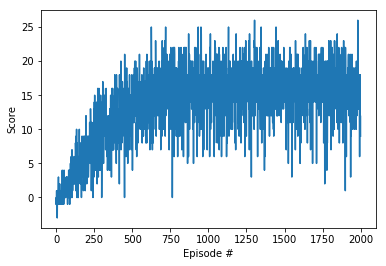

In [9]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [11]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0, filename='checkpoint.pth')
scores = dqn(agent, n_episodes=100, train_mode=False)

 Episodes : 100	Average Score : 1.05


In [12]:
env.close()